**Data Import and Structuring**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# # Bad version, not remove unnessary assays in networks
# import os
# import pandas as pd
# import numpy as np

# def merge_data_in_folder(base_path, ref_file_path):
#     # Load the reference file
#     ref_data = pd.read_excel(ref_file_path, sheet_name=None)
    
#     directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

#     for directory in directories:
#         folder_path = os.path.join(base_path, directory)
#         activity_file = os.path.join(folder_path, 'Compiled_ActivityScan.csv')
#         network_file = os.path.join(folder_path, 'Compiled_Networks.csv')
        
#         data_frames = []
        
#         if os.path.exists(activity_file):
#             df_activity = pd.read_csv(activity_file)
#             df_activity = df_activity.drop(['Run_ID', 'Time'], axis=1, errors='ignore')
#             data_frames.append(df_activity)

#         if os.path.exists(network_file):
#             df_network = pd.read_csv(network_file)
#             ref_sheet_name = directory  # Assuming the sheet name corresponds to the directory
            
#             if ref_sheet_name in ref_data:
#                 ref_df = ref_data[ref_sheet_name]
                
#                 # Ensure all reference and network DataFrame keys are strings and stripped
#                 ref_df = ref_df.astype(str).apply(lambda x: x.str.strip())
#                 df_network = df_network.astype(str).apply(lambda x: x.str.strip())

#                 # Get rows from the reference that are for "Network Today" or "Network"
#                 filter_rows = ref_df[ref_df['Assay'].isin(['Network Today', 'Network'])]
#                 filter_values = filter_rows[['Run #', 'Div', 'Wells_Recorded', 'ID']].values

#                 # Create a mask for rows to keep in df_network
#                 mask = df_network.apply(lambda row: [row['Run_ID'], row['DIV'], row['Well'], row['Chip_ID']] in filter_values.tolist(), axis=1)
#                 df_network = df_network[mask]
            
#             df_network = df_network.drop(['Run_ID'], axis=1, errors='ignore')
#             data_frames.append(df_network)

#         if data_frames:
#             combined_df = data_frames[0]
#             for df in data_frames[1:]:
#                 combined_df = pd.merge(combined_df, df, on=['DIV', 'Chip_ID', 'Well', 'NeuronType'], how='outer')
#             combined_df.to_csv(os.path.join(folder_path, 'combined_data.csv'), index=False)
#             unmatched_rows = combined_df[combined_df.isnull().any(axis=1)]
#             unmatched_rows = unmatched_rows[['DIV', 'Well', 'NeuronType', 'Chip_ID']]
#             if not unmatched_rows.empty:
#                 print(f"Unmatched rows in {directory}:")
#                 print(unmatched_rows)

# # Specify the base path and reference file path
# base_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/HomoCheck'
# ref_file_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/Reffiles/Reffile.xlsx'
# merge_data_in_folder(base_path, ref_file_path)

In [29]:
# bad version use concat, not merge
# import os
# import pandas as pd
# import warnings

# # Ignore specific warnings
# warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
# warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

# def merge_data_in_folder(base_path, ref_file_path):
#     """
#     Process activity and network CSV files for each directory in base_path,
#     based on the reference Excel file at ref_file_path.

#     Parameters:
#     - base_path (str): The base directory containing the folders for processing.
#     - ref_file_path (str): The path to the reference Excel file.
#     """

#     # Load the reference file
#     ref_data = pd.read_excel(ref_file_path, sheet_name=None)

#     # Loop over directories in the base_path
#     directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

#     for directory in directories:
#         folder_path = os.path.join(base_path, directory)
#         activity_file = os.path.join(folder_path, 'Compiled_ActivityScan.csv')
#         network_file = os.path.join(folder_path, 'Compiled_Networks.csv')

#         if os.path.exists(activity_file) and os.path.exists(network_file):
#             # Process activity file
#             df_activity = pd.read_csv(activity_file)
#             df_activity[['Run_ID', 'DIV', 'Well', 'Chip_ID']] = df_activity[['Run_ID', 'DIV', 'Well', 'Chip_ID']].astype(str).apply(lambda x: x.str.strip())
#             df_activity = df_activity.drop(['Run_ID', 'Time'], axis=1, errors='ignore')

#             # Process network file
#             df_network = pd.read_csv(network_file)
#             ref_sheet_name = directory  # Assuming the sheet name corresponds to the directory

#             if ref_sheet_name in ref_data:
#                 ref_df = ref_data[ref_sheet_name]
#                 # Filter rows based on 'Assay'
#                 valid_ref_df = ref_df[ref_df['Assay'].isin(['Network Today', 'Network', 'Network Today/Best'])]

#                 # Convert "Wells Recorded" to string, split into individual wells, and explode into separate rows
#                 valid_ref_df['Wells_Recorded'] = valid_ref_df['Wells_Recorded'].astype(str).str.split(',')
#                 valid_ref_df = valid_ref_df.explode('Wells_Recorded').reset_index(drop=True)

#                 # Convert all relevant columns to strings and strip whitespace
#                 valid_ref_df[['Run #', 'DIV', 'Wells_Recorded', 'ID']] = valid_ref_df[['Run #', 'DIV', 'Wells_Recorded', 'ID']].astype(str).apply(lambda x: x.str.strip())
#                 df_network[['Run_ID', 'DIV', 'Well', 'Chip_ID']] = df_network[['Run_ID', 'DIV', 'Well', 'Chip_ID']].astype(str).apply(lambda x: x.str.strip())

#                 # Filter df_network using the adjusted mask
#                 df_network = df_network[df_network.set_index(['Run_ID', 'DIV', 'Well', 'Chip_ID']).index.isin(valid_ref_df.set_index(['Run #', 'DIV', 'Wells_Recorded', 'ID']).index)]

#             df_network = df_network.drop(['Run_ID'], axis=1, errors='ignore')

#             # Add unique identifier column to both dataframes
#             df_activity['UniqueID'] = df_activity[['DIV', 'Well', 'Chip_ID', 'NeuronType']].agg('-'.join, axis=1)
#             df_network['UniqueID'] = df_network[['DIV', 'Well', 'Chip_ID', 'NeuronType']].agg('-'.join, axis=1)

#             # Horizontally concatenate the dataframes
#             combined_df = pd.concat([df_activity, df_network], axis=0)
            
#             # Remove duplicate rows based on 'unique_id'
#             combined_df = combined_df.drop_duplicates(subset='UniqueID')

#             # Save the combined dataframe
#             combined_df.to_csv(os.path.join(folder_path, 'combined_data.csv'), index=False)

#     print("Data processing completed for all directories")


# # Example usage
# base_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/HomoCheck'
# ref_file_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/Reffiles/Reffile.xlsx'

# merge_data_in_folder(base_path, ref_file_path)

In [30]:
# Good version, remove unnessary assays in networks
import os
import pandas as pd
import warnings

# Ignore specific warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

def merge_data_in_folder(base_path, ref_file_path):
    """
    Process activity and network CSV files for each directory in base_path,
    based on the reference Excel file at ref_file_path.

    Parameters:
    - base_path (str): The base directory containing the folders for processing.
    - ref_file_path (str): The path to the reference Excel file.
    """

    # Load the reference file
    ref_data = pd.read_excel(ref_file_path, sheet_name=None)

    # Loop over directories in the base_path
    directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

    for directory in directories:
        folder_path = os.path.join(base_path, directory)
        activity_file = os.path.join(folder_path, 'Compiled_ActivityScan.csv')
        network_file = os.path.join(folder_path, 'Compiled_Networks.csv')

        if os.path.exists(activity_file) and os.path.exists(network_file):
            # Process activity file
            df_activity = pd.read_csv(activity_file)
            df_activity[['Run_ID', 'DIV', 'Well', 'Chip_ID']] = df_activity[['Run_ID', 'DIV', 'Well', 'Chip_ID']].astype(str).apply(lambda x: x.str.strip())
            df_activity = df_activity.drop(['Run_ID', 'Time'], axis=1, errors='ignore')

            # Process network file
            df_network = pd.read_csv(network_file)
            ref_sheet_name = directory  # Assuming the sheet name corresponds to the directory

            if ref_sheet_name in ref_data:
                ref_df = ref_data[ref_sheet_name]
                # Filter rows based on 'Assay'
                valid_ref_df = ref_df[ref_df['Assay'].isin(['Network Today', 'Network', 'Network Today/Best'])]

                # Convert "Wells Recorded" to string, split into individual wells, and explode into separate rows
                valid_ref_df['Wells_Recorded'] = valid_ref_df['Wells_Recorded'].astype(str).str.split(',')
                valid_ref_df = valid_ref_df.explode('Wells_Recorded').reset_index(drop=True)

                # Convert all relevant columns to strings and strip whitespace
                valid_ref_df[['Run #', 'DIV', 'Wells_Recorded', 'ID']] = valid_ref_df[['Run #', 'DIV', 'Wells_Recorded', 'ID']].astype(str).apply(lambda x: x.str.strip())
                df_network[['Run_ID', 'DIV', 'Well', 'Chip_ID']] = df_network[['Run_ID', 'DIV', 'Well', 'Chip_ID']].astype(str).apply(lambda x: x.str.strip())

                # Filter df_network using the adjusted mask
                df_network = df_network[df_network.set_index(['Run_ID', 'DIV', 'Well', 'Chip_ID']).index.isin(valid_ref_df.set_index(['Run #', 'DIV', 'Wells_Recorded', 'ID']).index)]

            df_network = df_network.drop(['Run_ID','Time'], axis=1, errors='ignore')

            # Merge df_activity and df_network directly
            # combined_df = pd.merge(df_activity, df_network, on=['DIV', 'Chip_ID', 'Well', 'NeuronType'], how='outer') # Outer join to keep all rows
            combined_df = pd.merge(df_activity, df_network, on=['DIV', 'Chip_ID', 'Well', 'NeuronType'], how='inner') # Inner join to keep only matching rows
            
            # Remove duplicate rows
            combined_df = combined_df.drop_duplicates()
            combined_df.to_csv(os.path.join(folder_path, 'combined_data.csv'), index=False)

    print("Data processing completed for all directories")


# Example usage
base_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/HomoCheck'
ref_file_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/Reffiles/Reffile.xlsx'

merge_data_in_folder(base_path, ref_file_path)

Data processing completed for all directories


In [31]:
import os
import pandas as pd

def combine_all_data(base_path):
    # Initialize an empty DataFrame to store all combined data
    all_data = pd.DataFrame()

    # List all directories in the specified path
    directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

    for directory in directories:
        folder_path = os.path.join(base_path, directory)
        combined_data_path = os.path.join(folder_path, 'combined_data.csv')
        
        # Check if combined_data.csv exists in the folder
        if os.path.exists(combined_data_path):
            df = pd.read_csv(combined_data_path)
            # Add a new column 'Trial' with the folder name
            # Ensure 'Trial' is inserted right after 'Chip_ID'
            if 'Chip_ID' in df.columns:
                # Find index of 'Chip_ID' column
                loc = df.columns.get_loc('Chip_ID') + 1
                # Insert 'Trial' column right after 'Chip_ID'
                df.insert(loc, 'Trial', directory)
            else:
                df['Trial'] = directory  # Fallback if 'Chip_ID' is not in the columns

            # Append the DataFrame to the all_data DataFrame
            all_data = pd.concat([all_data, df], ignore_index=True)
        else:
            print(f"No combined_data.csv found in {directory}")

    # Save the final combined DataFrame to a CSV file
    all_data.to_csv(os.path.join(base_path, 'all_combined_data.csv'), index=False)

    # Print the shape of the final DataFrame to confirm the number of rows and columns
    print(f"Final combined data shape: {all_data.shape}")
    return all_data

# Specify the base path
base_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/HomoCheck'
data = combine_all_data(base_path)

Final combined data shape: (1368, 28)


In [32]:
data.head()

,DIV,Well,NeuronType,Chip_ID,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_IBI,cov_IBI,...,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor,Burst_Peak_Abs,Burst_Peak_Normalized
0,5,1,MxHEMI,M07039,CDKL5-E6D_T1_C1_05152024,0.601701,72.853541,25.606061,11.740000,52.305887,...,0.0,1.267112,313.628048,0.073282,103.861536,0.357242,68.420284,178.884363,NaN,NaN
1,5,2,WT,M07039,CDKL5-E6D_T1_C1_05152024,1.005935,49.774901,15.848485,44.700000,0.000000,...,NaN,0.740302,289.047687,NaN,NaN,NaN,NaN,12.371173,NaN,NaN
2,5,3,FxHET,M07039,CDKL5-E6D_T1_C1_05152024,0.668804,68.087166,14.712121,42.716667,77.475001,...,0.0,0.976505,287.602414,0.048190,92.642437,0.345847,69.803350,41.171271,NaN,NaN
3,5,4,MxHEMI,M07039,CDKL5-E6D_T1_C1_05152024,0.465627,74.338109,21.621212,17.620000,39.863558,...,0.0,1.618887,295.330918,0.066445,107.517068,0.378431,66.455322,208.423889,NaN,NaN
4,5,5,WT,M07039,CDKL5-E6D_T1_C1_05152024,0.859133,48.574638,15.787879,NaN,NaN,...,NaN,0.866212,285.151705,NaN,NaN,NaN,NaN,14.770573,NaN,NaN


In [33]:
# select trials
trials = ['ADNP_T4_C1_06282024','CDKL5-E6D_T1_C1_05152024', 'KCNT1_T1_08082023','KCNT1_T3_C1_03122024','SHANK3_T1_11222023','SYNGAP1_T1_C1_03212024']
trials_data = data[data['Trial'].isin(trials)]

In [34]:
# select WT data
wt_data = trials_data[trials_data['NeuronType'] == 'WT']
wt_data.shape

(438, 28)

In [35]:
wt_data.head()

,DIV,Well,NeuronType,Chip_ID,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_IBI,cov_IBI,...,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor,Burst_Peak_Abs,Burst_Peak_Normalized
1,5,2,WT,M07039,CDKL5-E6D_T1_C1_05152024,1.005935,49.774901,15.848485,44.7,0.000000,...,NaN,0.740302,289.047687,NaN,NaN,NaN,NaN,12.371173,NaN,NaN
4,5,5,WT,M07039,CDKL5-E6D_T1_C1_05152024,0.859133,48.574638,15.787879,NaN,NaN,...,NaN,0.866212,285.151705,NaN,NaN,NaN,NaN,14.770573,NaN,NaN
6,5,1,WT,M07420,CDKL5-E6D_T1_C1_05152024,0.966328,60.385641,23.863636,29.1,106.383339,...,0.0,0.977964,351.166363,0.110062,129.623709,0.332086,71.646849,41.721689,NaN,NaN
7,5,2,WT,M07420,CDKL5-E6D_T1_C1_05152024,0.866217,62.207961,18.530303,180.0,0.000000,...,NaN,1.050997,388.106047,NaN,NaN,NaN,NaN,55.491613,NaN,NaN
8,5,3,WT,M07420,CDKL5-E6D_T1_C1_05152024,0.973242,59.716902,18.030303,66.9,75.009672,...,0.0,0.963180,344.971740,0.083943,159.761376,0.331156,73.224236,56.761980,NaN,NaN


In [36]:
# check div 21
# Assuming 'Trial' is a column, find unique trials
trials = data['Trial'].unique()

# Define the DIV range
div_range = range(19, 26)  # This will include 20, 21, 22, 23, 24, 25

# Prepare to check for DIV presence in each trial
results = {}

for trial in trials:
    # Filter the data for the current trial
    trial_data = data[data['Trial'] == trial]
    present_divs = [div for div in div_range if any(trial_data['DIV'] == div)]
    
    # Store the results with a format
    if present_divs:
        results[trial] = f"div {', '.join(map(str, present_divs))} present in trial {trial}"
    else:
        results[trial] = f"No divs from {div_range.start} to {div_range.stop - 1} present in trial {trial}"

# Output the formatted results
for trial, result in results.items():
    print(result)

div 20, 23 present in trial CDKL5-E6D_T1_C1_05152024
div 19, 22 present in trial SYNGAP1_T1_C1_03212024
div 21, 25 present in trial ADNP_T2_10262023
div 21, 24 present in trial KCNT1_T3_C1_03122024
div 23 present in trial SPTAN1_T1_07192023
div 24 present in trial KCNT1_T1_08082023
div 24 present in trial ADNP_T3_11072023
div 20, 23 present in trial SHANK3_T1_11222023
div 21, 25 present in trial ADNP_T4_C1_06282024
div 25 present in trial CHD8_T2_C1_08252023


In [37]:
# Unique trials
trials = wt_data['Trial'].unique()

# Prepare a DataFrame to store selected data
selected_data = pd.DataFrame()

# Store DIV selection for each trial
div_selections = {}

for trial in trials:
    # Data for the current trial
    trial_data = wt_data[wt_data['Trial'] == trial]

    # Check if DIV 21 is present
    if (trial_data['DIV'] == 21).any():
        # Select DIV == 21 data
        selected_rows = trial_data[trial_data['DIV'] == 21]
        div_selections[trial] = 21
    else:
        # Find the DIV closest to 21
        closest_div = trial_data.iloc[(trial_data['DIV'] - 21).abs().argsort()[:1]]
        selected_rows = trial_data[trial_data['DIV'] == closest_div['DIV'].values[0]]
        div_selections[trial] = closest_div['DIV'].values[0]

    # Append the selected rows to the final DataFrame
    selected_data = pd.concat([selected_data, selected_rows], ignore_index=True)

# Print the DIV selected for each trial
for trial, div in div_selections.items():
    print(f"Selected DIV {div} for trial {trial}")

Selected DIV 20 for trial CDKL5-E6D_T1_C1_05152024
Selected DIV 22 for trial SYNGAP1_T1_C1_03212024
Selected DIV 21 for trial KCNT1_T3_C1_03122024
Selected DIV 24 for trial KCNT1_T1_08082023
Selected DIV 20 for trial SHANK3_T1_11222023
Selected DIV 21 for trial ADNP_T4_C1_06282024


**Exploratory Data Analysis (EDA)**

Selected features: Activity area, Spike Amplitude, Firing Rate, network: ..., ISI

In [38]:
selected_data.columns

Index(['DIV', 'Well', 'NeuronType', 'Chip_ID', 'Trial', 'Mean_FiringRate',
       'Mean_SpikeAmplitude', 'Active_area', 'mean_IBI', 'cov_IBI',
       'mean_Burst_Peak', 'cov_Burst_Peak', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'mean_BurstDuration', 'cov_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI', 'MeanWithinBurstISI',
       'CoVWithinBurstISI', 'MeanOutsideBurstISI', 'CoVOutsideBurstISI',
       'Fanofactor', 'Burst_Peak_Abs', 'Burst_Peak_Normalized'],
      dtype='object')

In [39]:
# select features
basic_info = ['DIV', 'Well', 'Chip_ID', 'NeuronType', 'Trial']
basic_features = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
            'mean_Burst_Peak', 'Number_Bursts', 'mean_BurstDuration']

In [40]:
basic_data = selected_data[basic_info + basic_features]
basic_data

,DIV,Well,Chip_ID,NeuronType,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_Burst_Peak,Number_Bursts,mean_BurstDuration
0,20,2,M07039,WT,CDKL5-E6D_T1_C1_05152024,1.983021,97.197132,88.590909,9.958695,113,0.472566
1,20,5,M07039,WT,CDKL5-E6D_T1_C1_05152024,1.613199,89.469344,83.454545,9.131061,82,0.457317
2,20,1,M07420,WT,CDKL5-E6D_T1_C1_05152024,1.781625,112.321619,93.515152,8.487390,111,0.436036
3,20,2,M07420,WT,CDKL5-E6D_T1_C1_05152024,2.140018,123.103925,88.878788,8.111178,97,0.396907
4,20,3,M07420,WT,CDKL5-E6D_T1_C1_05152024,2.475439,105.979421,95.348485,7.405860,124,0.736290
...,...,...,...,...,...,...,...,...,...,...,...
70,21,5,M07427,WT,ADNP_T4_C1_06282024,1.202521,85.167516,62.151515,7.576762,89,0.424719
71,21,6,M07427,WT,ADNP_T4_C1_06282024,1.224134,103.094472,76.212121,7.770449,84,0.441667
72,21,4,M07427,WT,ADNP_T4_C1_06282024,2.019299,83.349436,70.090909,8.609956,84,0.509524
73,21,5,M07427,WT,ADNP_T4_C1_06282024,1.517481,82.881946,60.128788,7.576762,89,0.424719


In [41]:
# count missing values
missing_values = basic_data.isnull().sum()
missing_values
# look at missing values
missing_data = basic_data[basic_data.isnull().any(axis=1)]
missing_data

,DIV,Well,Chip_ID,NeuronType,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_Burst_Peak,Number_Bursts,mean_BurstDuration


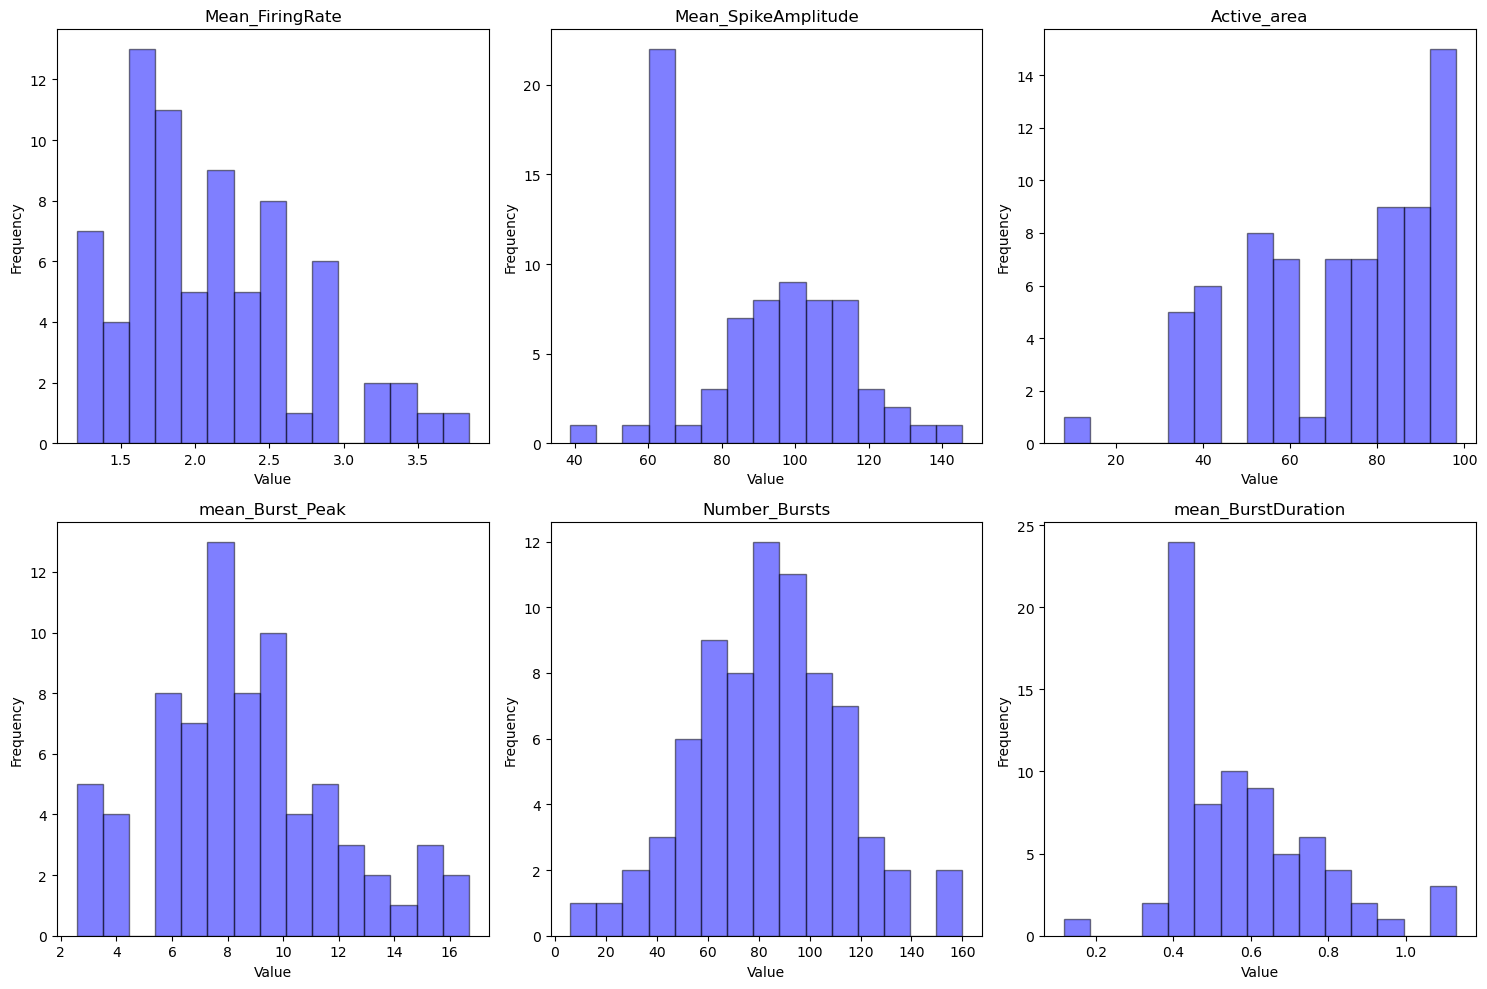

In [42]:
# distribution of features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for ax, feature in zip(axes.flatten(), basic_features):
    ax.hist(basic_data[feature], bins=15, color='blue', alpha=0.5, edgecolor='black')
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

fig.tight_layout()
plt.show()

**Statistical Testing for Homogeneity**

**Multivariate Assessment**

***Assessment of Normality***

Shapiro-Wilk Test or Kolmogorov-Smirnov Test can be used to assess whether each feature follows a normal distribution across trials. This will help determine whether parametric or non-parametric tests should be applied.

In [43]:
# Shapiro-Wilk test
from scipy.stats import shapiro

# Initialize a dictionary to store the results
normality_results = {}

# Perform the Shapiro-Wilk test for each feature
for feature in basic_features:
    stat, p_value = shapiro(basic_data[feature])
    normality_results[feature] = {'Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
normality_test_df = pd.DataFrame(normality_results).T
normality_test_df

,Statistic,p-value
Mean_FiringRate,0.946126,0.003074
Mean_SpikeAmplitude,0.964693,0.034595
Active_area,0.918318,0.000132
mean_Burst_Peak,0.971811,0.092480
Number_Bursts,0.993274,0.964271
mean_BurstDuration,0.897685,0.000017


In [44]:
# Kolmogorov-Smirnov test
from scipy.stats import kstest
import pandas as pd

ks_results = {}

for feature in basic_features:
    # Standardize the data before performing the test
    standardized_data = (basic_data[feature] - basic_data[feature].mean()) / basic_data[feature].std()
    stat, p_value = kstest(standardized_data, 'norm')
    ks_results[feature] = {'Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
ks_test_df = pd.DataFrame(ks_results).T
ks_test_df

,Statistic,p-value
Mean_FiringRate,0.108596,0.316143
Mean_SpikeAmplitude,0.149290,0.063495
Active_area,0.128478,0.153973
mean_Burst_Peak,0.083160,0.646646
Number_Bursts,0.057415,0.953670
mean_BurstDuration,0.130448,0.142404


Most of the features, except for "Number of Bursts" and possibly "Mean Burst Peak," do not appear to be normally distributed based on the Shapiro-Wilk test results. This information is crucial for further statistical analyses, as many parametric tests assume normality of the data.

However, all of these features appear to be normally distributed based on Kolmogorov-Smirnov (KS) test.

**Univariate Assessment**

First, we can select one feature, namely Active_area for analysis.

In [45]:
# Initialize a dictionary to store results
results = {}

# Group data by 'Trial'
grouped = basic_data.groupby('Trial')

# Perform tests for each trial
for trial, group in grouped:
    active_area_data = group['Active_area']
    mean, std = active_area_data.mean(), active_area_data.std()
    
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = shapiro(active_area_data)
    shapiro_result = 'Normal' if shapiro_p >= 0.05 else 'Not Normal'
    
    # Kolmogorov-Smirnov test
    ks_stat, ks_p = kstest(active_area_data, 'norm', args=(mean, std))
    ks_result = 'Normal' if ks_p >= 0.05 else 'Not Normal'
    
    # Store results
    results[trial] = {
        'Shapiro-Wilk Statistic': shapiro_stat,
        'Shapiro-Wilk p-value': shapiro_p,
        'Shapiro-Wilk Result': shapiro_result,
        'Kolmogorov-Smirnov Statistic': ks_stat,
        'Kolmogorov-Smirnov p-value': ks_p,
        'Kolmogorov-Smirnov Result': ks_result
    }

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results).T
results_df

,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,Shapiro-Wilk Result,Kolmogorov-Smirnov Statistic,Kolmogorov-Smirnov p-value,Kolmogorov-Smirnov Result
ADNP_T4_C1_06282024,0.923966,0.426081,Normal,0.171594,0.915097,Normal
CDKL5-E6D_T1_C1_05152024,0.925772,0.299751,Normal,0.166363,0.809111,Normal
KCNT1_T1_08082023,0.892877,0.18267,Normal,0.218805,0.649001,Normal
KCNT1_T3_C1_03122024,0.801321,0.000525,Not Normal,0.214117,0.230043,Normal
SHANK3_T1_11222023,0.866285,0.112153,Normal,0.23416,0.626896,Normal
SYNGAP1_T1_C1_03212024,0.901551,0.1661,Normal,0.201961,0.641506,Normal


***Assessment of Homogeneity of Variance***

Use tests like Levene’s Test or Bartlett’s Test to check the homogeneity of variances across trials, which is an assumption for ANOVA.

In [46]:
# Levene's test
import pandas as pd
from scipy.stats import levene
import numpy as np


# Group data by 'Trial' and extract 'Active_area' values for each group
groups = [group['Active_area'].values for name, group in basic_data.groupby('Trial')]

# Perform Levene's test for homogeneity of variances
stat, p_value = levene(*groups)

print(f"Levene's Test Statistic: {stat:.3f}")
print(f"Levene's Test p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Suggests heterogeneity of variances.")
else:
    print("Fail to reject the null hypothesis: Suggests homogeneity of variances.")

Levene's Test Statistic: 3.773
Levene's Test p-value: 0.004
Reject the null hypothesis: Suggests heterogeneity of variances.


In [51]:
# Bartlett’s Test

from scipy.stats import bartlett
# Group data by 'Trial' and extract 'Active_area' values for each group
groups = [group['Active_area'].values for name, group in basic_data.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
stat, p_value = bartlett(*groups)

print(f"Bartlett’s Test Statistic: {stat:.3f}")
print(f"Bartlett’s Test p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Suggests heterogeneity of variances.")
else:
    print("Fail to reject the null hypothesis: Suggests homogeneity of variances.")

Bartlett’s Test Statistic: 32.810
Bartlett’s Test p-value: 0.000
Reject the null hypothesis: Suggests heterogeneity of variances.


<Figure size 1500x1200 with 0 Axes>

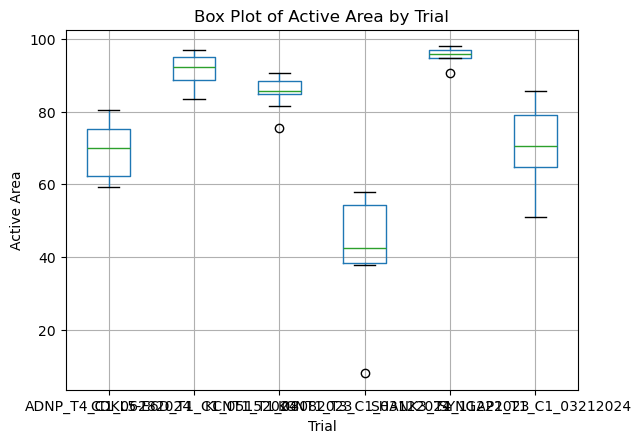

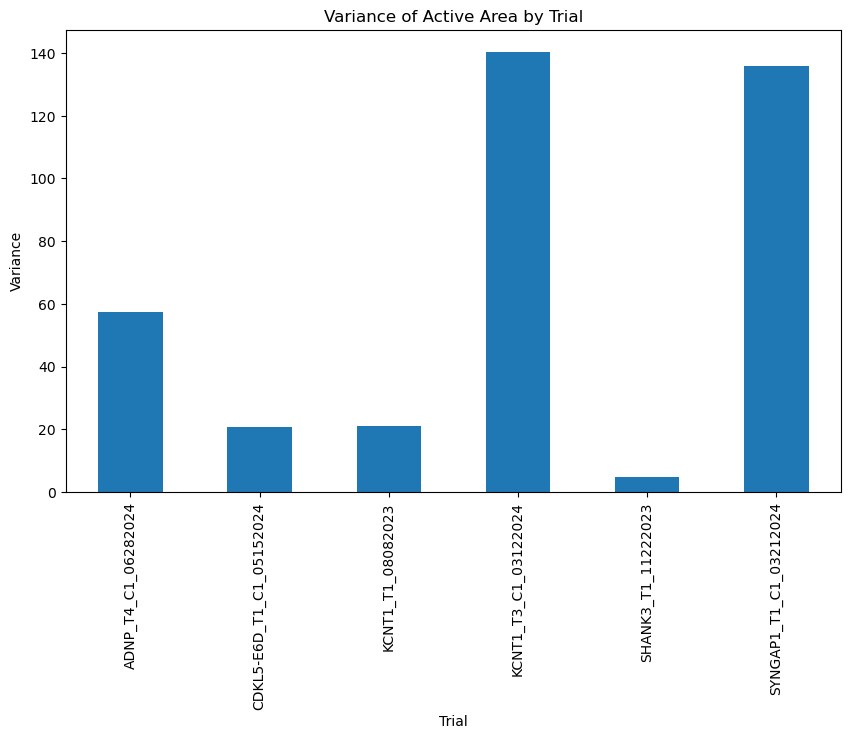

In [49]:
# Plotting Box Plots
plt.figure(figsize=(15, 12))
basic_data.boxplot(column='Active_area', by='Trial')
plt.title('Box Plot of Active Area by Trial')
plt.suptitle('')  # Remove default suptitle to clean up plot appearance
plt.xlabel('Trial')
plt.ylabel('Active Area')
plt.show()

# Calculating and Plotting Variances
group_variances = basic_data.groupby('Trial')['Active_area'].var()
plt.figure(figsize=(10, 6))
group_variances.plot(kind='bar')
plt.title('Variance of Active Area by Trial')
plt.xlabel('Trial')
plt.ylabel('Variance')
plt.show()

In [56]:
# try log transformation
# Adding a small constant in case of zero or negative values
basic_data['Log_Active_area'] = np.log(basic_data['Active_area'] + 1 - basic_data['Active_area'].min())

# Group data by 'Trial' and extract 'Log_Active_area' values for each group
groups = [group['Log_Active_area'].values for name, group in basic_data.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
bartlett_stat, bartlett_p_value = bartlett(*groups)
print(f"Bartlett’s Test Statistic: {bartlett_stat:.3f}")
print(f"Bartlett’s Test p-value: {bartlett_p_value:.3f}")

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = levene(*groups)
print(f"Levene's Test Statistic: {levene_stat:.3f}")
print(f"Levene's Test p-value: {levene_p_value:.3f}")

# Interpretation
if bartlett_p_value < 0.05:
    print("Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Bartlett's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

if levene_p_value < 0.05:
    print("Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

Bartlett’s Test Statistic: 143.955
Bartlett’s Test p-value: 0.000
Levene's Test Statistic: 1.539
Levene's Test p-value: 0.189
Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.
Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.


<Figure size 1500x1200 with 0 Axes>

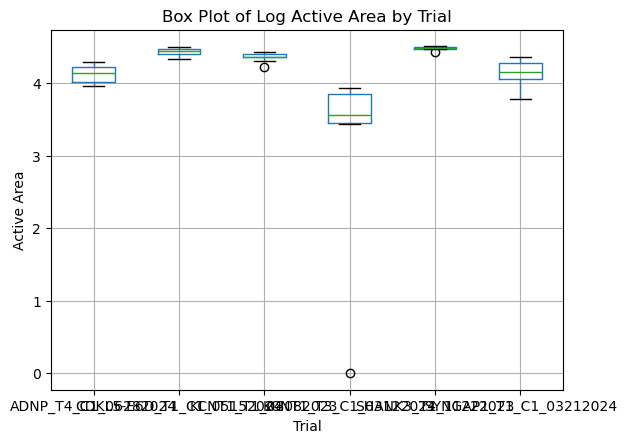

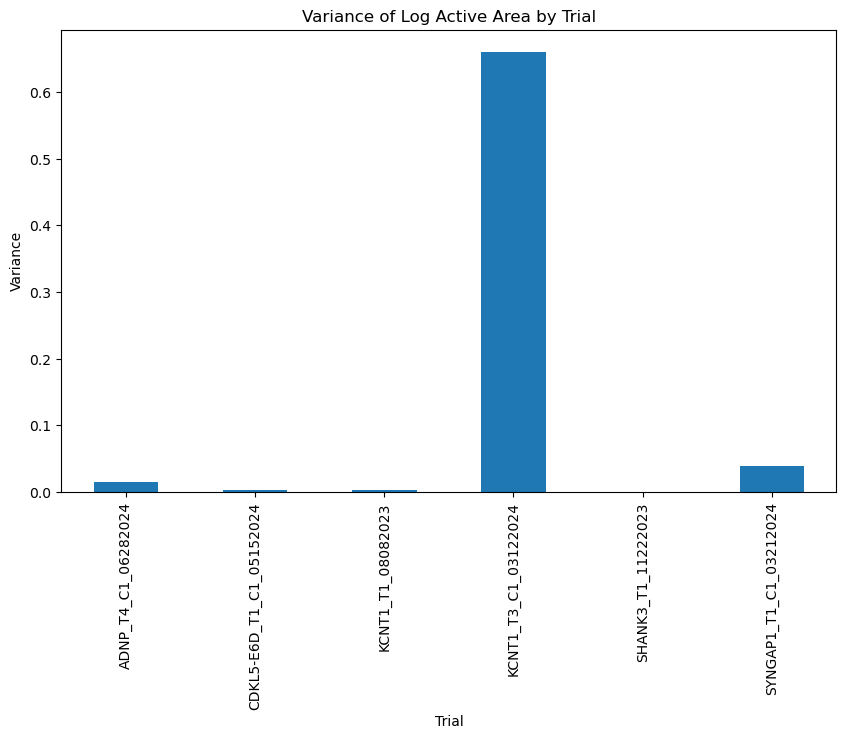

In [57]:
# Plotting Box Plots
plt.figure(figsize=(15, 12))
basic_data.boxplot(column='Log_Active_area', by='Trial')
plt.title('Box Plot of Log Active Area by Trial')
plt.suptitle('')  # Remove default suptitle to clean up plot appearance
plt.xlabel('Trial')
plt.ylabel('Active Area')
plt.show()

# Calculating and Plotting Variances
group_variances = basic_data.groupby('Trial')['Log_Active_area'].var()
plt.figure(figsize=(10, 6))
group_variances.plot(kind='bar')
plt.title('Variance of Log Active Area by Trial')
plt.xlabel('Trial')
plt.ylabel('Variance')
plt.show()

In [58]:
# Try to rule out KCNT1_T1_08082023 do the test again (KCNT1_T1_08082023 is the trial with the largest variance also not pass the quick test last week)
# Select all trials except 'KCNT1_T1_08082023'
selected_trials = basic_data[basic_data['Trial'] != 'KCNT1_T1_08082023']
# Group data by 'Trial' and extract 'Log_Active_area' values for each group
groups = [group['Active_area'].values for name, group in selected_trials.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
bartlett_stat, bartlett_p_value = bartlett(*groups)
print(f"Bartlett’s Test Statistic: {bartlett_stat:.3f}")
print(f"Bartlett’s Test p-value: {bartlett_p_value:.3f}")

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = levene(*groups)
print(f"Levene's Test Statistic: {levene_stat:.3f}")
print(f"Levene's Test p-value: {levene_p_value:.3f}")

# Interpretation
if bartlett_p_value < 0.05:
    print("Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Bartlett's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

if levene_p_value < 0.05:
    print("Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

Bartlett’s Test Statistic: 27.433
Bartlett’s Test p-value: 0.000
Levene's Test Statistic: 3.612
Levene's Test p-value: 0.011
Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.
Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.


In [59]:
# Try to rule out KCNT1_T1_08082023 and SYNGAP1_T3_C1_08092024 and do the test again
# Select all trials except 'KCNT1_T1_08082023'
selected_trials = basic_data[basic_data['Trial'] != 'KCNT1_T1_08082023']
# Group data by 'Trial' and extract 'Log_Active_area' values for each group
log_groups = [group['Log_Active_area'].values for name, group in selected_trials.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
bartlett_stat, bartlett_p_value = bartlett(*log_groups)
print(f"Bartlett’s Test Statistic: {bartlett_stat:.3f}")
print(f"Bartlett’s Test p-value: {bartlett_p_value:.3f}")

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = levene(*log_groups)
print(f"Levene's Test Statistic: {levene_stat:.3f}")
print(f"Levene's Test p-value: {levene_p_value:.3f}")

# Interpretation
if bartlett_p_value < 0.05:
    print("Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Bartlett's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

if levene_p_value < 0.05:
    print("Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

Bartlett’s Test Statistic: 116.661
Bartlett’s Test p-value: 0.000
Levene's Test Statistic: 1.488
Levene's Test p-value: 0.217
Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.
Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.


***Anova(one way)***

In [60]:
import pandas as pd
from scipy.stats import f_oneway
import numpy as np

# Group data by 'Trial' and extract 'Active_area' values for each group
groups = {name: group['Active_area'].values for name, group in basic_data.groupby('Trial')}

# Perform One-Way ANOVA
anova_stat, anova_p_value = f_oneway(*groups.values())

print(f"ANOVA F-Statistic: {anova_stat:.3f}")
print(f"ANOVA p-value: {anova_p_value:.3f}")

# Interpretation
if anova_p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")


ANOVA F-Statistic: 68.747
ANOVA p-value: 0.000
There is a statistically significant difference between the groups.


***Multivariate Analysis of Variance (MANOVA)***

MANOVA can be used to assess the differences across trials on a combination of dependent variables. It helps determine if the vector of means of the dependent variables is the same across trials.

If assumptions above (normality, homogeneity of variances) are not violated, continue with MANOVA. If the assumptions of ANOVA are violated, consider using non-parametric alternatives like the Kruskal-Wallis test.

***PCA (Principal Component Analysis)***

to explore overall feature variation between trials

**Post-hoc Testing (Turkey's test)**

If ANOVA or Kruskal-Wallis shows significant differences, follow up with post-hoc tests like Tukey’s HSD (for ANOVA) or Dunn’s test (for Kruskal-Wallis) to pinpoint which trials are significantly different.

**Optional**

Between-study heterogeneity was assessed and quantified by Cochran’s Q-statistic along with corresponding p-values and Higgins I 2 test (Higgins and Thompson 2002). The p-value of Q-statistic ≥ 0.05 indicated insignificant heterogeneity among all studies, and the value of I 2 over 25%, 50%, and 75% implied low, moderate, and high levels of heterogeneity, respectively (Higgins et al. 2003).

**Visualization**

Use boxplots, scatter plots, or violin plots to visually compare the distribution of each feature across trials.
Consider plotting confidence intervals to see how much overlap there is between trials.